In [29]:
import numpy as np
import matplotlib.pyplot as plt
from open_ephys.analysis import Session
from ripple_detection import filter_ripple_band,Kay_ripple_detector
from scipy import signal

In [11]:
session = Session('D:/HexinData/Dylan_2024-03-25_13-58-44_HPC')
recording = session.recordnodes[0].recordings[1]
timestamps = recording.continuous[0].timestamps

# align_file = open(base_folder / 'alignmentinfo_README.txt', "r")
# align_info = align_file.readlines()

# A = float(align_info[1][3:-1])
# B = float(align_info[0][3:-1])

# # aligned to behavior
# timestamps_aligned = timestamps*A+B

# # assign behavior aligned timestamps to each spike
# spikes_ts = timestamps_aligned[spikes]

In [27]:
filtered_lfps = filter_ripple_band(lfps)

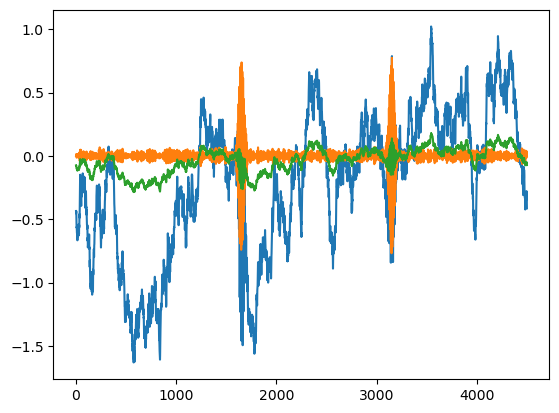

In [46]:
sos = signal.butter(1, [150,250], btype='bandpass',output='sos',fs=SAMPLING_FREQUENCY)
filtered = signal.sosfilt(sos, lfps)
plt.close('all')
plt.plot(lfps)
plt.plot(filtered_lfps)
plt.plot(filtered)

In [19]:
import scipy.stats
from ripple_detection.simulate import simulate_time, brown

SAMPLING_FREQUENCY = 1500
n_samples = SAMPLING_FREQUENCY * 3
time = simulate_time(n_samples, SAMPLING_FREQUENCY)
brown_noise = brown(time.shape[0])
RIPPLE_FREQUENCY = 200
ripple_signal = np.sin(2 * np.pi * time * RIPPLE_FREQUENCY)
carrier = scipy.stats.norm(loc=1.05, scale=0.100 / 6).pdf(time)
carrier /= carrier.max()

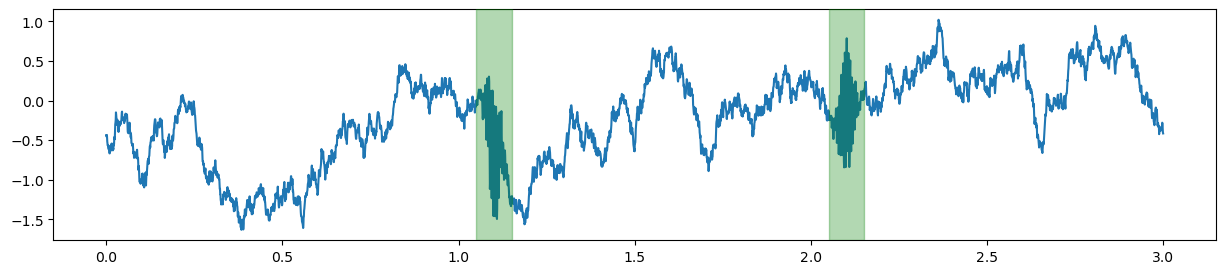

In [26]:
from ripple_detection.simulate import simulate_LFP

true_ripple_midtime = [1.1, 2.1]
RIPPLE_DURATION = 0.100
lfps = simulate_LFP(
    time, true_ripple_midtime, noise_amplitude=1.2, ripple_amplitude=1.5
)[:, np.newaxis]
speed = np.ones_like(time)

fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(time, lfps)


for midtime in true_ripple_midtime:
    plt.axvspan(
        midtime - RIPPLE_DURATION / 2,
        midtime + RIPPLE_DURATION / 2,
        alpha=0.3,
        color="green",
        zorder=1000,
    )

In [12]:
samplesize = recording.continuous[0].samples.shape[0]
chunksize=30000*60  ## 1 minute
bins = int(np.floor(samplesize/chunksize))

# # for bb in range(bins):
bb=0
    
voltage = recording.continuous[0].get_samples(start_sample_index=chunksize*bb, end_sample_index=chunksize*(bb+1))
ts = recording.continuous[0].timestamps[chunksize*bb:chunksize*(bb+1)]
x=voltage[:,16]
# sos = signal.butter(1, 300, btype='lowpass',output='sos',fs=30000)
# filtered = signal.sosfilt(sos, x)

In [54]:
sos = signal.butter(1, [100,250], btype='bandpass',output='sos',fs=30000)
filtered = signal.sosfilt(sos, x)

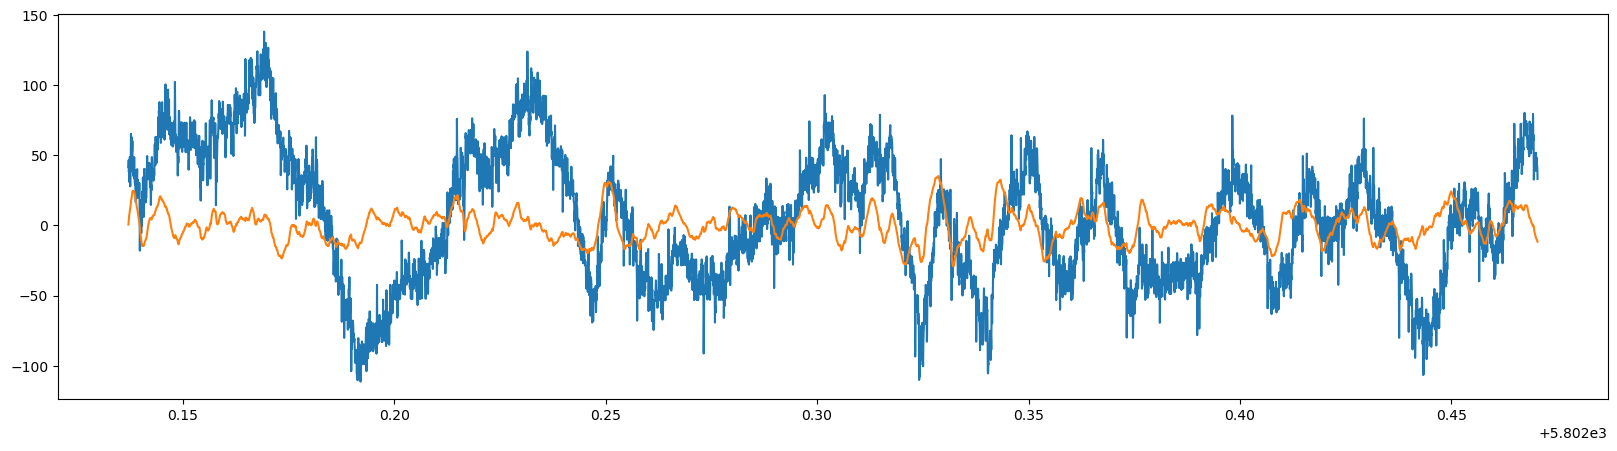

In [55]:
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(ts[0:10000],x[0:10000])
plt.plot(ts[0:10000],filtered[0:10000])

In [ ]:
filtered_lfps = filter_ripple_band(x)

ripple_times = Kay_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)

for midtime in true_ripple_midtime:
    ax.axvspan(
        midtime - RIPPLE_DURATION / 2,
        midtime + RIPPLE_DURATION / 2,
        alpha=0.3,
        color="green",
        zorder=9,
    )

for ripple in ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=10)